In [1]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np
# import spectrum
import pandas as pd
import scipy
import scipy.io
from tqdm import tqdm
import torch

In [2]:
# os.listdir("sample_data")
# data = mne.io.read_raw_edf("sample_data/ND-2014701773NTEL-C_Sélection1_Sélection1.EDF")
# data = mne.io.read_raw_edf("sample_data/ND-2014701797JTEL-C_Sélection1_Sélection1.EDF")
# /Users/alexchang/OneDrive - Universite de Montreal/epilepsy-connectivity/sample_data/
# /Users/alexchang/OneDrive - Universite de Montreal/epilepsy-connectivity/sample_data/

In [5]:
# ======= preprocessing ===========

def start_end_idx(data):
    '''
    Returns the index of the annotation description array 
    corresponding to the start and end of seizures.
    '''
    print(data.annotations.description)
    return np.where(data.annotations.description == 'Sz clin ON')[0][0], np.where(data.annotations.description == 'Sz clin OFF')[0][0]



def preprocess(fn):
    
    data = mne.io.read_raw_edf(fn, preload=True)
    data.pick_types(seeg=True)
    
    # resampling removes annotations
#     data.resample(500)

    raw_data = data.get_data()
    
    p1 = np.percentile(raw_data, 1)
    p99 = np.percentile(raw_data, 99)
    raw_data[raw_data > p99] = p99
    raw_data[raw_data < p1] = p1
    
    
    means = np.mean(raw_data, axis=1)
    std = np.std(raw_data, axis=1)
    
    raw_data = (raw_data - means[..., np.newaxis]) / std[..., np.newaxis]
#     print(np.mean(raw_data), np.std(raw_data))
#     data.plot(n_channels=128)

    if 'Sz clin ON' in data.annotations.description:
        start_annot_idx, end_annot_idx = start_end_idx(data)
    else:
        print(data.annotations.description)
        return None, None
    
    start_time = data.annotations.onset[start_annot_idx]
    end_time = data.annotations.onset[end_annot_idx]
    
    start_idx = np.where(data.times == start_time)[0][0]
    end_idx = np.where(data.times == end_time)[0][0]
    seizure = raw_data[:, start_idx:end_idx]
    
    seizure = torch.from_numpy(seizure).unsqueeze(0)
    seizure = torch.nn.functional.interpolate(seizure, scale_factor=0.25, mode="linear")
    seizure = seizure.squeeze(0).squeeze(0).numpy()
    return seizure, data.ch_names


def preprocess_dir(root, out_dir):

    i = 0
    for fn in tqdm(sorted(os.listdir(root))):
        try:
            seizure, ch_names = preprocess(os.path.join(root, fn))
            
            if seizure is not None:
                i += 1
                np.save(os.path.join(out_dir, "{}.npy".format(fn[:-4])), seizure)
                df = pd.DataFrame(ch_names)
                df.to_csv("{}.csv".format(fn[:-4]))
                print(ch_names)
                print(i, "annotations found")
                
        except:
            print(fn)
        

In [6]:


root = "/Users/lauragagliano/Documents/alexc/edf"
out_dir = "/Users/lauragagliano/Documents/alexc/npy"




preprocess_dir(root, out_dir)



  0%|          | 0/167 [00:00<?, ?it/s]

.DS_Store
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701773NTEL-C_Sélection1_Sélection1.SIG_ND-2014701773NTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2524703  =      0.000 ...  1262.351 secs...
['Sz clin ON' 'CRISE' 'BOUGE' 'Sz clin OFF']


  1%|          | 2/167 [00:15<20:43,  7.54s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
1 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701773NTEL-C_Sélection1_Sélectio

  2%|▏         | 3/167 [00:30<30:06, 11.02s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
2 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701797JTEL-C_Sélection1_Sélectio

  2%|▏         | 4/167 [00:47<35:10, 12.95s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
3 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701797NTEL-C_Sélection1_Sélectio

  3%|▎         | 5/167 [01:02<37:23, 13.85s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
4 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701797NTEL-C_Sélection1_Sélectio

  4%|▎         | 6/167 [01:20<40:31, 15.10s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
5 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701816JTEL-1C_Sélection1_Sélecti

  4%|▍         | 7/167 [01:36<40:46, 15.29s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
6 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701816JTEL-C_Sélection1_Sélectio

  5%|▍         | 8/167 [01:51<40:19, 15.22s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
7 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701831TEL-C_Sélection1_Sélection

  5%|▌         | 9/167 [02:06<40:23, 15.34s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
8 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701833TEL-C_Sélection1_Sélection

  6%|▌         | 10/167 [02:21<39:39, 15.16s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
9 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701866JTEL_Sélection1_Sélection1

  7%|▋         | 11/167 [02:37<39:55, 15.35s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
10 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701895JTEL-C_Sélection1_Sélecti

  7%|▋         | 12/167 [02:48<36:46, 14.23s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
11 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701925JTEL-C_Sélection1_Sélecti

  8%|▊         | 13/167 [02:58<33:08, 12.91s/it]

['CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'Sz clin ON' 'CRISE'
 'Me: Might be noise ON' "dit vient d'Avoir absence" 'Sz clin OFF1'
 'Me: Might be noise OFF' 'Sz clin OFF' 'Me: Might be noise ON'
 'TEST APHASIE' 'Me: Might be noise OFF' 'Me : Noise with drifts ON'
 'Me : Noise with drifts OFF' 'Me : Noise with drifts ON'
 'Me : Noise with drifts OFF' 'Me: Might be noise ON'
 'Me: Might be noise OFF' 'Me: Might be noise ON' 'Me: Might be noise OFF'
 'Me: Might be noise ON' 'Me: Might be noise OFF']
['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41

  8%|▊         | 14/167 [03:14<35:25, 13.89s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
13 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701954NTEL-C_Sélection1_Sélecti

  9%|▉         | 15/167 [03:30<36:49, 14.53s/it]

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
14 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/01_leblanc_updated_ND-2014701974TEL-C_Sélection1_Sélectio

 10%|▉         | 16/167 [03:32<26:35, 10.57s/it]

['Sz clin ON' 'CRISE' 'Sz clin OFF']
['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86']
15 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND

 10%|█         | 17/167 [03:47<30:16, 12.11s/it]

['POINTE T3-A1-H1' 'POINTE G2' 'POINTES T3-A1-H1H3' 'POINTE T3-H1'
 'POINTES G22, G23, ' 'POINTE T3-A1-H1-H3' 'POINTE T3-A1-H1-H3'
 'POINTES T2-H2' 'POINTES T2-H2' 'Seizure ON' 'CRISE' 'Seizure OFF'
 'POINTES T2-H2' 'POINTE T3-A1-H1' 'POINTE T3-A1-H1' 'POINTE T3-A1-H1'
 'BUZZ' 'POINTE H1, H3, U2, H2' 'POINTES U2, U4, H2'
 'JPOINTES T3, A1, H1, H3' 'JPOINTES T3, A1, H1, H3'
 'JPOINTES T3, A1, H1, H2' 'POINTES U2, U4' 'POINTES T2 -H2'
 'POINTE T3-H1']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702919JTEL-1C_Sélection1_Sélection1_Sélection1.SIG_ND-2013702919JTEL-1C_Sélection1_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2751755  =      0.000 ...  1375.878 secs...


 11%|█         | 18/167 [04:04<33:31, 13.50s/it]

['Seizure ON' 'POINTE T3-A1-H1' 'POINTE T3-A1-H1' 'CRISE' 'Seizure OFF'
 'POINTE T2-H2' 'POINTE G2' 'POINTE T3-A1-H1' 'POINTE T3-A1-H1-T2-H2'
 'POINTE T3-A1-H1' 'POINTE T3-A1-H1']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702919JTEL-1C_Sélection1_Sélection3_Sélection1.SIG_ND-2013702919JTEL-1C_Sélection1_Sélection3_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2718911  =      0.000 ...  1359.456 secs...


 11%|█▏        | 19/167 [04:21<35:37, 14.44s/it]

['POINTE T3-A1-H1' 'POINTE G2' 'POINTES T3-A1-H1H3' 'POINTE T3-H1'
 'POINTES G22, G23, ' 'POINTE T3-A1-H1-H3' 'POINTE T3-A1-H1-H3'
 'POINTES T2-H2' 'POINTES T2-H2' 'Seizure ON' 'CRISE' 'Seizure OFF'
 'POINTES T2-H2' 'POINTE T3-A1-H1' 'POINTE T3-A1-H1' 'POINTE T3-A1-H1'
 'BUZZ' 'POINTE H1, H3, U2, H2' 'POINTES U2, U4, H2'
 'JPOINTES T3, A1, H1, H3' 'JPOINTES T3, A1, H1, H3'
 'JPOINTES T3, A1, H1, H2' 'POINTES U2, U4' 'POINTES T2 -H2'
 'POINTE T3-H1' 'POINTE T3-A1-H1-H3-H2']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702919NTEL-1C_Sélection1_Sélection1.SIG_ND-2013702919NTEL-1C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2511137  =      0.000 ...  1255.569 secs...


 12%|█▏        | 20/167 [04:36<35:59, 14.69s/it]

['Seizure ON' 'CRISE' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702943JTEL-C_Sélection1_Sélection1.SIG_ND-2013702943JTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1566515  =      0.000 ...   783.258 secs...


 13%|█▎        | 21/167 [04:46<31:54, 13.12s/it]

['BUZZ' 'Seizure ON' 'CRISE' 'PTE AVISE' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702943NTEL-C_SÉLECTION1_Sélection1.SIG_ND-2013702943NTEL-C_SÉLECTION1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2512803  =      0.000 ...  1256.401 secs...


 13%|█▎        | 22/167 [05:01<33:30, 13.87s/it]

['BUZZ' 'BUZZ' 'Seizure ON' 'CRISE' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702966TEL-C_Sélection1_Sélection1.SIG_ND-2013702966TEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2456873  =      0.000 ...  1228.437 secs...


 14%|█▍        | 23/167 [05:17<34:21, 14.32s/it]

['CRISE' 'Seizure ON' 'Seizure OFF' 'POINTE T2-H2']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702966TEL-C_Sélection2_Sélection1.SIG_ND-2013702966TEL-C_Sélection2_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2520419  =      0.000 ...  1260.209 secs...


 14%|█▍        | 24/167 [05:32<34:59, 14.68s/it]

['POINTE T3-A1-H1-H3' 'POINTE H2' 'Seizure ON' 'CRISE' 'Seizure ON']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013702966TEL-C_Sélection3_Sélection1.SIG_ND-2013702966TEL-C_Sélection3_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2617047  =      0.000 ...  1308.524 secs...


 15%|█▍        | 25/167 [05:48<35:46, 15.12s/it]

['Seizure ON' 'CRISE' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703041JTEL-1C_Sélection1_Sélection1.SIG_ND-2013703041JTEL-1C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2600625  =      0.000 ...  1300.312 secs...


 16%|█▌        | 26/167 [06:05<36:57, 15.73s/it]

['POINTE T3-A1-H1' 'POINTE T3-A1-H1' 'POINTE T3-A1-H1' 'Seizure ON'
 'CRISE' 'Seizure OFF' 'POINTE T2-H2' 'POINTE T2-H2']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703041NTEL-C_Sélection11_Sélection1.SIG_ND-2013703041NTEL-C_Sélection11_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2504473  =      0.000 ...  1252.236 secs...


 16%|█▌        | 27/167 [06:21<36:30, 15.64s/it]

['POINTE T3-H1' 'Seizure ON' 'CRISE' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703041NTEL-C_Sélection1_Sélection1.SIG_ND-2013703041NTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2585869  =      0.000 ...  1292.935 secs...


 17%|█▋        | 28/167 [06:37<36:39, 15.83s/it]

['Seizure ON' 'CRISE' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703041NTEL-C_Sélection2_Sélection1.SIG_ND-2013703041NTEL-C_Sélection2_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2505663  =      0.000 ...  1252.832 secs...


 17%|█▋        | 29/167 [06:52<36:03, 15.68s/it]

['Seizure ON' 'CRISE' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703081JTEL-1C_Sélection2_Sélection1.SIG_ND-2013703081JTEL-1C_Sélection2_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2394993  =      0.000 ...  1197.496 secs...


 18%|█▊        | 30/167 [07:07<35:07, 15.38s/it]

['BUZZ' 'Seizure ON' 'CRISE' 'Seizure OFF' 'POINTE T3-A1-H1-H3'
 'POINTE T3-A1-H1-H3']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703081JTEL-1C_Sélection2_Sélection2.SIG_ND-2013703081JTEL-1C_Sélection2_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2703203  =      0.000 ...  1351.601 secs...


 19%|█▊        | 31/167 [07:23<35:24, 15.62s/it]

['POINTE T3-A1-H1-H3' 'POINTE T3-A1-H1-H3' 'Seizure ON' 'CRISE'
 'Seizure OFF' 'POINTE T3-A1-H1-H3' 'POINTE T3-A1-H1-H3']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703107NTEL-C_Sélection1_Sélection1.SIG_ND-2013703107NTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2535175  =      0.000 ...  1267.588 secs...


 19%|█▉        | 32/167 [07:38<34:38, 15.39s/it]

['Seizure ON1' 'Seizure ON2' 'Seizure ON' 'CRISE' 'SPASME MI'
 'ARRETE LE TRICOT' 'Seizure OFF' 'REPRISE DU TRICOT' 'ARTEFACT']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703107NTEL-C_Sélection2_Sélection1.SIG_ND-2013703107NTEL-C_Sélection2_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2591581  =      0.000 ...  1295.791 secs...


 20%|█▉        | 33/167 [07:54<34:25, 15.42s/it]

['POINTE T12-T31-A1-H16' 'Seizure ON' 'Seizure ON1' 'CRISE' 'BOUGE'
 'TETE VERS LA DROITE' 'Seizure OFF' 'Seizure OFF1' 'Seizure OFF2']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703123TEL-C_Sélection1_Sélection1.SIG_ND-2013703123TEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2676785  =      0.000 ...  1338.392 secs...


 20%|██        | 34/167 [08:10<34:32, 15.58s/it]

['Seizure ON' 'Seizure ON1' 'CRISE' 'BOUGE MI' 'BOUGE MS' 'Seizure OFF'
 'Seizure OFF1' 'POINTE T31-H17']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703125TEL-C_Sélection1_Sélection1.SIG_ND-2013703125TEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2590391  =      0.000 ...  1295.196 secs...


 21%|██        | 35/167 [08:25<34:21, 15.62s/it]

['ACTIVITE RAPIDE U4' 'Seizure ON' 'CRISE' 'Seizure OFF' 'Seizure OFF1']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_ND-2013703125TEL-C_Sélection1_Sélection2.SIG_ND-2013703125TEL-C_Sélection1_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2756991  =      0.000 ...  1378.495 secs...


 22%|██▏       | 36/167 [08:41<34:27, 15.79s/it]

['TOUCHE FILS-SAC' 'Seizure ON' 'Seizure OFF' 'Seizure OFF1'
 'Seizure OFF2' 'POINTES A1, H1, T2, H2']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/02_Sainte Louis J_interictal_ND-2013702999JTEL_Sélection1.SIG_ND-2013702999JTEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1676233  =      0.000 ...   838.116 secs...


 22%|██▏       | 37/167 [08:51<30:28, 14.06s/it]

['POINTE T3-A1-H1-H3' 'POINTE T3-A1-H1-H3']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013705864JTEL-1_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2934063  =      0.000 ...  1467.032 secs...
['POINTES O16' 'POINTES O16' 'MANIPULATION PATIENT/FILS'
 'POINTES O2,O4,O6' 'POINTES O2,O4,O6' 'POINTES DIFFUSES'
 'POINTES O5,O4,O6,O12,O14' 'POINTES O4,O6' 'Sz clin ON'
 'POINTESO2, O4,O6' 'POINTESO2, O4,O6' 'Sz clin OFF1' 'POINTES O16'
 'Sz clin OFF' 'POINTES O5' 'POINTES O16' 'POINTES O2,O4,O6' 'POINTES O16'
 'POINTES O14, O16' 'POINTES DIFFUSE' 'POINTES O12,O14,O16,O18,O22'
 'POINTES O16' 'POINTES O12,O14,O16,O18,O22' 'POINTES O5,O12,O14,O16']


 23%|██▎       | 38/167 [09:08<32:03, 14.91s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
16 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013705912JTEL_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type

 23%|██▎       | 39/167 [09:25<32:50, 15.39s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
17 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013705976JTEL-1C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel t

 24%|██▍       | 40/167 [09:26<23:38, 11.17s/it]

['CRISE ÉLECTRIQUE' 'CRISE ÉLECTRIQUE' 'Sz clin ON' 'CRISE CLINIQUE'
 'CLIGNE PAUPIERE' 'Sz clin OFF' 'BUZZ']
['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
18 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013705976JTEL-1C_

 25%|██▍       | 41/167 [09:27<16:58,  8.08s/it]

['BUZZ' 'Sz clin ON' 'CRISE CLINIQUE - CLIGNE PAUPIERE' 'Sz clin OFF']
['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
19 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013705976JTEL-1C_Sélection1_Sélection2-CloseToP.EDF...
E

 25%|██▌       | 42/167 [09:31<14:13,  6.83s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
20 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013705976NTEL-C_Sélection1_Sélection1-CloseToNext.EDF...
EDF file detected
Setting channel info structure...
Could not determin

 26%|██▌       | 43/167 [09:43<17:15,  8.35s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
21 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013705976NTEL-C_Sélection1_Sélection1-CloseToP.EDF...
EDF file detected
Setting channel info structure...
Could not determine c

 26%|██▋       | 44/167 [09:53<18:26,  8.99s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
22 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_ND-2013706017JTEL-C_Sélection2_Sélection1-Short.EDF...
EDF file detected
Setting channel info structure...
Could not determine chan

 27%|██▋       | 45/167 [10:01<17:15,  8.49s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
23 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_longer version_ND-2013705864JTEL-1_Sélection1.SIG_ND-2013705864JTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info stru

 28%|██▊       | 46/167 [10:38<34:41, 17.20s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
24 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_longer version_ND-2013705912JTEL_Sélection1.SIG_ND-2013705912JTEL_Sélection1.EDF...
EDF file detected
Setting channel info structur

 28%|██▊       | 47/167 [11:26<52:52, 26.43s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
25 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_longer version_ND-2013705976JTEL-1C_Sélection1.SIG_ND-2013705976JTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info st

 29%|██▊       | 48/167 [12:00<56:56, 28.71s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
26 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_longer version_ND-2013705976NTEL-C_Sélection1.SIG_ND-2013705976NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info stru

 29%|██▉       | 49/167 [12:37<1:01:07, 31.08s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
27 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_longer version_ND-2013706017JTEL-C_Sélection1.SIG_ND-2013706017JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info stru

 30%|██▉       | 50/167 [13:04<58:29, 29.99s/it]  

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
28 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/03_Andreanne Hamel lesieur_longer version_ND-2013706017JTEL-C_Sélection2.SIG_ND-2013706017JTEL-C_Sélection2.EDF...
EDF file detected
Setting channel info stru

 31%|███       | 51/167 [17:48<3:24:55, 105.99s/it]

['O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O31', 'O32', 'O33', 'O34', 'O35', 'O36', 'O51', 'O52', 'O53', 'O54', 'O55', 'O56', 'O57', 'O58', 'O71', 'O72', 'O73', 'O74', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O41', 'O42', 'O43', 'O44', 'O45', 'O46', 'O47', 'O48', 'O61', 'O62', 'O63', 'O64', 'O65', 'O66', 'O67', 'O68', 'O81', 'O82', 'O83', 'O84', 'O85', 'O86', 'O101', 'O102', 'O103', 'O104', 'O105', 'O106', 'O121', 'O122', 'O123', 'O124', 'O125', 'O126', 'O127', 'O128', 'O141', 'O142', 'O143', 'O144', 'O145', 'O146', 'O147', 'O148', 'O161', 'O162', 'O163', 'O164', 'O165', 'O166', 'O167', 'O168', 'O181', 'O182', 'O183', 'O184', 'O185', 'O186', 'O201', 'O202', 'O203', 'O204', 'O221', 'O222', 'O223', 'O224', 'O225', 'O226', 'O227', 'O228']
29 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701124JTEL-1_Sélection1.SIG_ND-2013701124JTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine 

 31%|███       | 52/167 [17:55<2:26:14, 76.30s/it] 

['PRISE PRESSION ART.' 'Sz clin ON' ' PTE AVISE' 'CRISE'
 'SON DE LA TV AMPLIFIE SELON PATIENTE' 'Sz clin OFF'
 ' PTE DIT CRISE FINIE' 'POINTES P22']
['G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G233', 'G234', 'G235', 'G236', 'G237', 'G238', 'G239', 'G240', 'G241', 'G242', 'G243', 'G244', 'G245', 'G246', 'G247', 'G248', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 'U28', 'U41', 'U42', 'U43', 'U44', 'U45', 'U46', 'U61', 'U62', 'U63', 'U64', 'U65', 'U66']
30 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701139STIMTEL-C_Sélection1_Sélection1.SIG_ND-2013701139STIMTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type 

 32%|███▏      | 53/167 [18:01<1:44:56, 55.23s/it]

['CONNECTER À: U61 - U62 2 mA' 'CONNECTER À: U61 - U62 2 mA'
 'CONNECTER À: U61 - U62 2 mA' 'CONNECTER À: U61 - U62 2 mA' 'Seizure ON'
 'CRISE' 'PTE AVISE' 'VISAGE GAUCHE ENGOURDIS' 'CRISE+CONNECTEUR'
 'incapable de parler' 'Seizure OFF1' 'Seizure OFF2' 'Seizure OFF'
 'PTE AVISE QUE CRISE FINIE' 'CONNECTER À: CZ - U62'
 'CONNECTER À: CZ - U62' 'CONNECTER À: CZ - U62' 'CONNECTER À: U61 - U62']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701159JTEL-C_Sélection1_Sélection1.SIG_ND-2013701159JTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2
Creating raw.info structure...
Reading 0 ... 1377555  =      0.000 ...  1377.555 secs...


 32%|███▏      | 54/167 [18:07<1:16:12, 40.46s/it]

['CRISE' 'ACTIVITE  G215   G222     P25' 'Seizure ON' 'YEUX OUVERTS'
 'PTE AVISE' 'OREILLE GAUCHE' 'Seizure OFF' 'FIN']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701172TEL-1_Sélection1.SIG_ND-2013701172TEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2494239  =      0.000 ...  1247.120 secs...


 33%|███▎      | 55/167 [18:18<59:07, 31.67s/it]  

['Not known ON' 'Not known OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701204JTEL_Sélection1.SIG_ND-2013701204JTEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2948581  =      0.000 ...  1474.291 secs...
['POINTES P25' 'ARTEFACTS U27-28???' 'Sz clin ON' 'AVISE AURA' 'CRISE'
 'Sz clin OFF']


 34%|███▎      | 56/167 [18:31<48:33, 26.25s/it]

['G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G233', 'G234', 'G235', 'G236', 'G237', 'G238', 'G239', 'G240', 'G241', 'G242', 'G243', 'G244', 'G245', 'G246', 'G247', 'G248', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 'U28', 'U41', 'U42', 'U43', 'U44', 'U45', 'U46', 'U61', 'U62', 'U63', 'U64', 'U65', 'U66']
31 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701204JTEL_Sélection2.SIG_ND-2013701204JTEL_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2628947  =      0.000 ...  1314.474 secs...


 34%|███▍      | 57/167 [18:43<40:12, 21.93s/it]

['Not Known ON' 'Not Known OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701204NTEL_Sélection1.SIG_ND-2013701204NTEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2906693  =      0.000 ...  1453.347 secs...


 35%|███▍      | 58/167 [18:57<35:05, 19.32s/it]

['Sz clin ON' 'APPEL INFIRMIÈRE' 'Sz clin OFF'
 "AVERTI QU'ELLE CROIT FAIRE UNE CRISE" 'FAIT DES SIGNES A LA CAMERA'
 "DIT QU'ELLE NE SENT PLUS RIEN"]
['G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G233', 'G234', 'G235', 'G236', 'G237', 'G238', 'G239', 'G240', 'G241', 'G242', 'G243', 'G244', 'G245', 'G246', 'G247', 'G248', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 'U28', 'U41', 'U42', 'U43', 'U44', 'U45', 'U46', 'U61', 'U62', 'U63', 'U64', 'U65', 'U66']
32 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701204NTEL_Sélection2.SIG_ND-2013701204NTEL_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they

 35%|███▌      | 59/167 [19:08<30:30, 16.95s/it]

['Not Known ON' 'Not Known OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_ND-2013701248JTEL-C_Sélection1.SIG_ND-2013701248JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 3535965  =      0.000 ...  1767.983 secs...


 36%|███▌      | 60/167 [19:23<29:28, 16.52s/it]

['PTE AVISE' 'Seizure ON' 'CRISE' 'Seizure OFF1' 'Seizure OFF2'
 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_longer version_ND-2013701139STIMTEL-C_Sélection1.SIG_ND-2013701139STIMTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2
Creating raw.info structure...
Reading 0 ... 2213102  =      0.000 ...  2213.102 secs...


 37%|███▋      | 61/167 [19:33<25:28, 14.42s/it]

['CONNECTER À: U61 - U62 1 mA' 'CONNECTER À: U61 - U62 1.5 mA'
 'CONNECTER À: U61 - U62 2 mA' 'CONNECTER À: U61 - U62 2 mA'
 'CONNECTER À: U61 - U62 2 mA' 'CONNECTER À: U61 - U62 2 mA' 'Seizure ON'
 'CRISE' 'PTE AVISE' 'VISAGE GAUCHE ENGOURDIS' 'CRISE+CONNECTEUR'
 'incapable de parler' 'Seizure OFF1' 'Seizure OFF2' 'Seizure OFF'
 'PTE AVISE QUE CRISE FINIE' 'CONNECTER À: CZ - U62'
 'CONNECTER À: CZ - U62' 'CONNECTER À: CZ - U62' 'CONNECTER À: U61 - U62']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_longer version_ND-2013701159JTEL-C_Sélection1.SIG_ND-2013701159JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2
Creating raw.info structure...
Reading 0 ... 2301067  =      0.000 ...  2301.067 secs...


 37%|███▋      | 62/167 [19:43<22:57, 13.12s/it]

['CRISE' 'ACTIVITE  G215   G222     P25' 'Seizure ON' 'YEUX OUVERTS'
 'PTE AVISE' 'OREILLE GAUCHE' 'Seizure OFF' 'FIN'
 'MANIPULATION PATIENT / FILS']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/04_Couture M_longer version_ND-2013701248JTEL-C_Sélection1.SIG_ND-2013701248JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 3535965  =      0.000 ...  1767.983 secs...


 38%|███▊      | 63/167 [19:59<24:00, 13.85s/it]

['PTE AVISE' 'Seizure ON' 'CRISE' 'Seizure OFF1' 'Seizure OFF2'
 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_ND-2011002590JTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2441403  =      0.000 ...  1220.701 secs...


 38%|███▊      | 64/167 [20:11<23:05, 13.45s/it]

['Sz clin ON' 'CRISE' 'Sz clin OFF' 'BUZZ' 'Sz clin ON' 'CRISE'
 'Sz clin OFF' 'CRISE' 'CRISE' 'Sz clin ON' 'CRISE' 'Sz clin OFF' 'BUZZ']
['I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I31', 'I32', 'I33', 'I34', 'I51', 'I52', 'I53', 'I54', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F81', 'F82', 'F83', 'F84', 'F101', 'F102', 'F103', 'F104', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56']
33 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_ND-2011002590JTEL-1C_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not de

 39%|███▉      | 65/167 [20:23<22:04, 12.99s/it]

['Sz clin ON' 'CRISE' 'Sz clin OFF' 'BUZZ' 'Sz clin ON' 'CRISE'
 'Sz clin OFF' 'CRISE' 'CRISE' 'Sz clin ON' 'CRISE' 'Sz clin OFF' 'BUZZ'
 'Sz clin ON' 'CRISE' 'Sz clin OFF' 'Sz clin ON' 'CRISE' 'CRISE'
 'Sz clin OFF' 'CRISE' 'habituelle' 'TACHYCARDIE' 'FIN CRISE']
['I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I31', 'I32', 'I33', 'I34', 'I51', 'I52', 'I53', 'I54', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F81', 'F82', 'F83', 'F84', 'F101', 'F102', 'F103', 'F104', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56']
34 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/ale

 40%|███▉      | 66/167 [20:34<20:52, 12.40s/it]

['Sz clin ON' 'CRISE' 'Sz clin OFF' 'BUZZ' 'Sz clin ON' 'CRISE'
 'Sz clin OFF' 'CRISE' 'CRISE' 'Sz clin ON' 'CRISE' 'Sz clin OFF' 'BUZZ'
 'Sz clin ON' 'CRISE' 'Sz clin OFF' 'Sz clin ON' 'CRISE' 'CRISE'
 'Sz clin OFF' 'CRISE' 'habituelle' 'TACHYCARDIE' 'FIN CRISE']
['I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I31', 'I32', 'I33', 'I34', 'I51', 'I52', 'I53', 'I54', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F81', 'F82', 'F83', 'F84', 'F101', 'F102', 'F103', 'F104', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56']
35 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/ale

 40%|████      | 67/167 [20:52<23:12, 13.92s/it]

['CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'Seizure ON' '+ LONGUE' 'HABITUELLE' 'Seizure OFF' 'CRISE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_ND-2011002655NTEL-1C_Sélection1_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2654413  =      0.000 ...  1327.207 secs...


 41%|████      | 68/167 [21:08<24:22, 14.78s/it]

['CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'Seizure ON' 'CRISE' '+ LONGUE'
 'HABITUELLE' 'Seizure OFF1' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_ND-2011002655NTEL-1C_Sélection1_Sélection3.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2856475  =      0.000 ...  1428.237 secs...


 41%|████▏     | 69/167 [21:27<26:03, 15.95s/it]

['CRISE' 'CRISE' 'Seizure ON' 'CRISE' '+ LONGUE' 'HABITUELLE'
 'Seizure OFF1' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_ND-2011002715TEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2832675  =      0.000 ...  1416.338 secs...
['CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'Not Known ON' 'Not Known OFF' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'Sz clin ON' 'CRISE' 'Sz clin OFF']


 42%|████▏     | 70/167 [21:45<26:31, 16.41s/it]

['I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I31', 'I32', 'I33', 'I34', 'I51', 'I52', 'I53', 'I54', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'C11', 'C12', 'C13', 'C14', 'C31', 'C32', 'C33', 'C34', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F81', 'F82', 'F83', 'F84', 'C21', 'C22', 'C23', 'C24', 'C41', 'C42', 'C43', 'C44', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
36 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_ND-2011002715TEL-

 43%|████▎     | 71/167 [22:00<25:39, 16.04s/it]

['CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'Not Known ON' 'CRISE'
 'Not Known OFF' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_longer version_ND-2011002655JTEL-1C_Sélection1.SIG_ND-2011002655JTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 5008471  =      0.000 ...  2504.235 secs...


 43%|████▎     | 72/167 [22:34<33:50, 21.37s/it]

['CRISE' 'CRISE' 'CRISE' 'POINTE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'EL ON' 'EL OFF' 'POINTE' 'CRISE' 'EL ON' 'EL OFF1' 'EL OFF'
 'CRISE' 'EL ON' 'EL OFF' 'EL ON' 'CRISE' 'EL OFF1' 'EL OFF' 'CRISE'
 'CRISE HABITUELLE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/05_Dumulon Morin_longer version_ND-2011002655NTEL-1C_Sélection1.SIG_ND-2011002655NTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 11520865  =      0.000 ...  5760.432 secs...


 44%|████▎     | 73/167 [24:37<1:21:17, 51.89s/it]

['CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE' 'CRISE'
 'Seizure ON' '+ LONGUE' 'HABITUELLE' 'Seizure OFF' 'CRISE' 'CRISE'
 'CRISE' 'CRISE' 'CRISE' 'Seizure ON' 'CRISE' '+ LONGUE' 'HABITUELLE'
 'Seizure OFF1' 'Seizure OFF' 'CRISE' 'CRISE' 'Seizure ON' 'CRISE'
 '+ LONGUE' 'HABITUELLE' 'Seizure OFF1' 'Seizure OFF' 'CRISE' 'CRISE'
 'CRISE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2679403  =      0.000 ...  1339.701 secs...
['T-I CRISE' 'Sz clin ON' 'T-I CRISE' 'Sz clin OFF']


 44%|████▍     | 74/167 [24:54<1:04:36, 41.68s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
37 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection10.EDF...
EDF file detected
Set

 45%|████▍     | 75/167 [25:05<49:32, 32.31s/it]  

['T-I CRISE' 'T-I CRISE' 'Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
38 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodh

 46%|████▌     | 76/167 [25:14<38:28, 25.37s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
39 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 46%|████▌     | 77/167 [25:30<33:57, 22.64s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
40 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection13.EDF...
EDF file detected
Set

 47%|████▋     | 78/167 [25:47<30:59, 20.90s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
41 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection14.EDF...
EDF file detected
Set

 47%|████▋     | 79/167 [26:04<28:43, 19.59s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
42 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection15.EDF...
EDF file detected
Set

 48%|████▊     | 80/167 [26:20<26:57, 18.59s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
43 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection16.EDF...
EDF file detected
Set

 49%|████▊     | 81/167 [26:31<23:18, 16.26s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
44 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection1_Sélection1.EDF...
EDF file de

 49%|████▉     | 82/167 [26:47<23:06, 16.31s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
45 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection1_Sélection2.EDF...
EDF file de

 50%|████▉     | 83/167 [27:01<21:40, 15.48s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
46 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection1_Sélection3.EDF...
EDF file de

 50%|█████     | 84/167 [27:14<20:35, 14.88s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
47 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection1_Sélection4.EDF...
EDF file de

 51%|█████     | 85/167 [27:23<17:38, 12.91s/it]

['Sz clin ON' 'CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
48 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sél

 51%|█████▏    | 86/167 [27:33<16:18, 12.08s/it]

['BUZZ' 'Sz clin ON' 'CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
49 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTE

 52%|█████▏    | 87/167 [27:44<15:43, 11.80s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
50 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 53%|█████▎    | 88/167 [27:52<14:08, 10.74s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
51 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 53%|█████▎    | 89/167 [28:06<15:14, 11.73s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
52 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C_Sélection5.EDF...
EDF file detected
Sett

 54%|█████▍    | 90/167 [28:18<15:15, 11.89s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
53 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 54%|█████▍    | 91/167 [28:22<11:55,  9.42s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
54 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 55%|█████▌    | 92/167 [28:28<10:34,  8.46s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF' 'T-I CRISE']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
55 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017

 56%|█████▌    | 93/167 [28:40<11:47,  9.56s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
56 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 56%|█████▋    | 94/167 [28:49<11:20,  9.32s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF' 'T-I CRISE']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
57 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017

 57%|█████▋    | 95/167 [28:51<08:30,  7.10s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
58 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 57%|█████▋    | 96/167 [29:00<08:53,  7.51s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
59 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017703209NTEL-C

 58%|█████▊    | 97/167 [29:08<09:12,  7.89s/it]

['T-I CRISE' 'Sz clin ON' 'T-I CRISE' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
60 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/06_AmyotGoodhue J_ND-2017

 59%|█████▊    | 98/167 [29:19<09:51,  8.57s/it]

['Sz clin ON' 'T-I CRISE' 'Sz clin OFF' 'T-I CRISE']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G31', 'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G310', 'G311', 'G312', 'G313', 'G314', 'G315', 'G316', 'G317', 'G318', 'G319', 'G320', 'G321', 'G322', 'G323', 'G324', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'F11', 'F12', 'F13', 'F14', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P31', 'P32', 'P33', 'P34', 'O11', 'O12', 'O13', 'O14', 'O31', 'O32', 'O33', 'O34', 'P51', 'P52', 'P53', 'P54']
61 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006588

 59%|█████▉    | 99/167 [29:27<09:32,  8.41s/it]

['Sz clin ON' 'Sz clin OFF1' 'Sz clin OFF2' 'Sz clin OFF']
['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
62 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-20

 60%|█████▉    | 100/167 [29:43<12:00, 10.76s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
63 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006590NTEL-2_Sélection2.EDF...
EDF file detected
Setting 

 60%|██████    | 101/167 [29:57<13:03, 11.87s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
64 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006590NTEL-2_Sélection3.EDF...
EDF file detected
Setting 

 61%|██████    | 102/167 [30:12<13:51, 12.80s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
65 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006590NTEL-2_Sélection4.EDF...
EDF file detected
Setting 

 62%|██████▏   | 103/167 [30:29<15:05, 14.14s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
66 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006590NTEL_Sélection1_remove.EDF...
EDF file detected
Set

 62%|██████▏   | 104/167 [30:45<15:09, 14.44s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
67 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006614JTEL_Sélection1.EDF...
EDF file detected
Setting ch

 63%|██████▎   | 105/167 [31:01<15:34, 15.08s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
68 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006614JTEL_Sélection2.EDF...
EDF file detected
Setting ch

 63%|██████▎   | 106/167 [31:19<16:07, 15.86s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
69 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006614JTEL_Sélection3.EDF...
EDF file detected
Setting ch

 64%|██████▍   | 107/167 [31:35<15:55, 15.93s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
70 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006614JTEL_Sélection4.EDF...
EDF file detected
Setting ch

 65%|██████▍   | 108/167 [31:53<16:12, 16.48s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
71 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006614NTEL-C_Sélection1.EDF...
EDF file detected
Setting 

 65%|██████▌   | 109/167 [32:08<15:39, 16.19s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'T11', 'T12', 'T13', 'T14', 'T31', 'T32', 'T33', 'T34', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'OF11', 'OF12', 'OF13', 'OF14', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124']
72 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/07_Gobeil S_ND-2012006614NTEL-C_Sélection1_Sélection1.EDF...
EDF file detect

 66%|██████▌   | 110/167 [32:24<15:11, 15.99s/it]

['Seizure ON1' 'Seizure ON' 'CRISE' 'Seizure OFF1' 'Seizure OFF2'
 'Seizure OFF' 'POINTES G12 - G111 - G119' 'POINTES G12 - G111 - G119']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/08_Chaouachi_ND-2015705795JTEL-1E_Sélection1.SIG_ND-2015705795JTEL-1E_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2024665  =      0.000 ...  1012.332 secs...


 66%|██████▋   | 111/167 [32:33<13:07, 14.06s/it]

['PONTES ONDES' 'PONTES ONDES' 'CRISE ÉLECTRIQUE' 'POINTE '
 'POINTES ONDES' 'POINTES ONDES' 'El Sz ON' 'POINTES ONDES' 'El Sz OFF'
 'POINTES ONDES' 'POINTES ONDES' 'CRISE ÉLECTRIQUE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/08_Chaouachi_ND-2015705951JTEL-C_Sélection1_Sélection1.SIG_ND-2015705951JTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2671311  =      0.000 ...  1335.656 secs...
['POINTE ' 'ACTIVITÉ RYTHMIQUE' 'Sz clin ON' 'CRISE' 'Sz clin ON1'
 'Sz clin OFF' 'Me: Might be noise ON' 'Me: Might be noise OFF'
 'Me: Might be noise ON' 'Me: Might be noise OFF' 'Me: Might be noise ON'
 'Me: Might be noise OFF' 'Me: Might be noise ON' 'Me: Might be noise OFF'
 'Me: Might be noise ON' 'Me: Might be noise OFF' 'Me: Might be noise ON'
 'Me: Might be noise OFF' 'M

 67%|██████▋   | 112/167 [32:46<12:34, 13.72s/it]

['G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G417', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'G424', 'G425', 'G426', 'G427', 'G428', 'G429', 'G430', 'G431', 'G432', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F81', 'F82', 'F83', 'F84', 'F85', 'F86', 'U21', 'U22', 'U23', 'U24', 'U41', 'U42', 'U43', 'U44']
73 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/08_Chaouachi_ND-2015705977JTEL-E_Sélection1.SIG_ND-2015705977JTEL-E_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...

 68%|██████▊   | 113/167 [32:58<11:48, 13.12s/it]

['POINTE ' 'POINTE ' 'CRISE ÉLECTRIQUE' 'CRISE ÉLECTRIQUE'
 'CRISE ÉLECTRIQUE' 'CRISE ÉLECTRIQUE' 'El Sz ON' 'El Sz OFF'
 'CRISE ÉLECTRIQUE' 'BUZZ']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/08_Chaouachi_ND-2015705978NTEL-E_Sélection1.SIG_ND-2015705978NTEL-E_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2685591  =      0.000 ...  1342.795 secs...


 68%|██████▊   | 114/167 [33:11<11:37, 13.16s/it]

['El Sz ON' 'CRISE ÉLECTRIQUE' 'ACTIVITÉ RAPIDE' 'El Sz OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/08_Chaouachi_ND-2015705978NTEL-E_Sélection2.SIG_ND-2015705978NTEL-E_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2596103  =      0.000 ...  1298.052 secs...


 69%|██████▉   | 115/167 [33:24<11:13, 12.96s/it]

['El Sz ON' 'CRISE ÉLECTRIQUE' 'El Sz OFF' 'CRISE ÉLECTRIQUE'
 'ACTIVITÉ RAPIDE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/08_Chaouachi_ND-2015705978NTEL-E_Sélection3.SIG_ND-2015705978NTEL-E_Sélection3.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2558975  =      0.000 ...  1279.487 secs...


 69%|██████▉   | 116/167 [33:36<10:55, 12.85s/it]

['El Sz ON' 'CRISE ÉLECTRIQUE + LONGUE' 'ARTEFACT?' 'ACTIVITÉ RAPIDE'
 'El Sz OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/09_Dufour K_ND-2016704368NTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2329067  =      0.000 ...  1164.534 secs...
['CRISE' 'POINTE' 'seizure onset1' 'Sz clin ON' 'Sz clin OFF1'
 'seizure termination1' 'Sz clin OFF']


 70%|███████   | 117/167 [33:51<11:03, 13.26s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'O14', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U110', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'U39', 'U310', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'U57', 'U58', 'U59', 'U510', 'F11', 'F12', 'F13', 'F14', 'F31', 'F32', 'F33', 'F34', 'F51', 'F52', 'F53', 'F54', 'F71', 'F72', 'F73', 'F74', 'F91', 'F92', 'F93', 'F94', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T52', 'T53', 'T54']
74 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/09_Dufour K_ND-2016704368NTEL-1C_Sélection2.EDF...
EDF file detect

 71%|███████   | 118/167 [34:02<10:24, 12.74s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'O14', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U110', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'U39', 'U310', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'U57', 'U58', 'U59', 'U510', 'F11', 'F12', 'F13', 'F14', 'F31', 'F32', 'F33', 'F34', 'F51', 'F52', 'F53', 'F54', 'F71', 'F72', 'F73', 'F74', 'F91', 'F92', 'F93', 'F94', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T52', 'T53', 'T54']
75 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/09_Dufour K_ND-2016704368NTEL-1C_Sélection3.EDF...
EDF file detect

 71%|███████▏  | 119/167 [34:08<08:39, 10.81s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'O14', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U110', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'U39', 'U310', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'U57', 'U58', 'U59', 'U510', 'F11', 'F12', 'F13', 'F14', 'F31', 'F32', 'F33', 'F34', 'F51', 'F52', 'F53', 'F54', 'F71', 'F72', 'F73', 'F74', 'F91', 'F92', 'F93', 'F94', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T52', 'T53', 'T54']
76 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/09_Dufour K_ND-2016704368NTEL-1C_Sélection4.EDF...
EDF file detect

 72%|███████▏  | 120/167 [34:18<08:17, 10.59s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'O14', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U110', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'U39', 'U310', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'U57', 'U58', 'U59', 'U510', 'F11', 'F12', 'F13', 'F14', 'F31', 'F32', 'F33', 'F34', 'F51', 'F52', 'F53', 'F54', 'F71', 'F72', 'F73', 'F74', 'F91', 'F92', 'F93', 'F94', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T52', 'T53', 'T54']
77 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/09_Dufour K_TOBECHECKED_ND-2016704486STIMTEL-C_Sélection1.EDF...
E

 72%|███████▏  | 121/167 [34:27<07:33,  9.87s/it]

['POINTES G2 U1-U3=U5' 'crise électrique?' 'seizure onset 1'
 'CRISE ÉLECTRIQUE?' 'seizure termination1' 'ICI']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/09_Dufour K_longer version_ND-2016704368NTEL-1C_Sélection1.SIG_ND-2016704368NTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 5706287  =      0.000 ...  2853.144 secs...
['CRISE' 'POINTE' 'seizure onset1' 'Sz clin ON' 'Sz clin OFF1'
 'seizure termination1' 'Sz clin OFF' 'POINTE' 'Sz clin ON'
 'seizure onset 2' 'POINTE' 'CRISE' 'Sz clin OFF' 'seizure termination 2'
 'Sz clin ON' 'ACTIVITE RYTHMIQUE' 'Sz clin OFF' 'Sz clin ON'
 'ACTIVITE RYTHMIQUE' 'CRISE' 'seizure onset 3' 'Sz clin OFF1'
 'Sz clin OFF' 'seizure termination 3']


 73%|███████▎  | 122/167 [35:03<13:24, 17.89s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'O14', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U110', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'U39', 'U310', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'U57', 'U58', 'U59', 'U510', 'F11', 'F12', 'F13', 'F14', 'F31', 'F32', 'F33', 'F34', 'F51', 'F52', 'F53', 'F54', 'F71', 'F72', 'F73', 'F74', 'F91', 'F92', 'F93', 'F94', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T52', 'T53', 'T54']
78 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006481JTEL-1C_Sélection1.EDF...
EDF file detect

 74%|███████▎  | 123/167 [35:18<12:27, 16.99s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
79 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006481NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be s

 74%|███████▍  | 124/167 [35:33<11:38, 16.25s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
80 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006481NTEL-C_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be s

 75%|███████▍  | 125/167 [35:46<10:50, 15.50s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
81 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006521JTEL-2C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be 

 75%|███████▌  | 126/167 [36:00<10:17, 15.07s/it]

['CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'El Sz ON'
 'CRISE ELECTRIQUE' 'El Sz OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006521NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2594199  =      0.000 ...  1297.100 secs...
['CRISE ELECTRIQUE' 'CRISE GÉLASTIQUE' 'Sz clin ON' 'debut clinique'
 'finclinique ' 'Sz clin OFF']


 76%|███████▌  | 127/167 [36:15<09:52, 14.80s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
82 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006521NTEL-C_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be s

 77%|███████▋  | 128/167 [36:29<09:26, 14.53s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
83 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006521NTEL-C_Sélection3.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be s

 77%|███████▋  | 129/167 [36:44<09:21, 14.77s/it]

['CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE'
 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'El Sz ON' 'CRISE ELECTRIQUE'
 'El Sz OFF' 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE'
 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006557JTEL-1C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2476151  =      0.000 ...  1238.075 secs...


 78%|███████▊  | 130/167 [36:58<08:55, 14.46s/it]

['CRISE' 'Seizure ON' 'CRISE' 'Seizure OFF' 'CRISE' 'EL ON'
 'CRISE ELECTRIQUE' 'EL OFF' 'EL ON' 'CRISE ELECTRIQUE' 'EL OFF'
 'Seizure ON' 'CRISE ELECTRIQUE' 'Seizure OFF' 'EL ON' 'CRISE ELECTRIQUE'
 'EL OFF' 'ACTIVITE RYTHMIQUE' 'EL ON' 'CRISE ELECTRIQUE' 'EL OFF' 'EL ON'
 'CRISE ELECTRIQUE' 'EL OFF' 'EL ON' 'CRISE ELECTRIQUE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006557JTEL-1C_Sélection1_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2343109  =      0.000 ...  1171.554 secs...


 78%|███████▊  | 131/167 [37:10<08:22, 13.96s/it]

['fin mvts<' 'CRISE' 'CRISE' 'Seizure ON' 'CRISE' 'Seizure OFF' 'CRISE'
 'EL ON' 'CRISE ELECTRIQUE' 'EL OFF' 'EL ON' 'CRISE ELECTRIQUE' 'EL OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006557NTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2650129  =      0.000 ...  1325.064 secs...
['CRISE GÉLASTIQUE' 'Sz clin ON' 'Sz clin OFF' 'fin']


 79%|███████▉  | 132/167 [37:25<08:11, 14.04s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
84 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006557NTEL-1C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, th

 80%|███████▉  | 133/167 [37:41<08:17, 14.64s/it]

['Seizure ON1' 'Seizure ON' 'CRISE GELASTIQUE' 'bouton d alarme'
 'position assise' 'mouvements de battement MS' 'fin' 'fin clinique'
 'POINTE I2-I4-I6' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006557NTEL-1C_Sélection2.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2675119  =      0.000 ...  1337.560 secs...
['Sz clin ON' 'CRISE GELASTIQUE' 'bouton d alarme' 'position assise'
 'mouvements de battement MS' 'Sz clin OFF' 'fin' 'fin clinique'
 'POINTE I2-I4-I6']


 80%|████████  | 134/167 [37:55<08:03, 14.65s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
85 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_ND-2010006557NTEL-1C_Sélection3.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be 

 81%|████████  | 135/167 [38:10<07:48, 14.65s/it]

['I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F41', 'F42', 'F43', 'F44', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G225', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G232', 'G41', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416']
86 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_longer version_ND-2010006557NTEL-1C_Sélection1.SIG_ND-2010006557NTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine ch

 81%|████████▏ | 136/167 [38:55<12:15, 23.73s/it]

['Seizure ON1' 'Seizure ON' 'CRISE GELASTIQUE' 'bouton d alarme'
 'position assise' 'mouvements de battement MS' 'fin' 'fin clinique'
 'POINTE I2-I4-I6' 'Seizure OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_longer version_ND-2010006594JTEL-1C_Sélection1.SIG_ND-2010006594JTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 3997923  =      0.000 ...  1998.961 secs...


<ipython-input-5-52db42139fa4>:15: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(fn, preload=True)
 82%|████████▏ | 137/167 [39:18<11:46, 23.55s/it]

['VERENA FACE EXP STOP' 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE'
 'CRISE ELECTRIQUE' 'EL ON' 'CRISE ELECTRIQUE' 'EL OFF1' 'EL OFF2'
 'EL OFF' 'EL ON' 'EL OFF' 'EL ON' 'EL OFF' 'To be remove ON'
 'To be removed OFF' 'EL ON' 'EL OFF' 'To be remove ON'
 'To be removed OFF' 'EL ON' 'EL OFF' 'EL ON' 'EL OFF']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/11_Rodrigue_longer version_ND-2010006594JTEL-C_Sélection1.SIG_ND-2010006594JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 4085031  =      0.000 ...  2042.515 secs...


 83%|████████▎ | 138/167 [39:41<11:16, 23.32s/it]

['EL ON' 'CRISE ELECTRIQUE' 'EL OFF' 'EL ON' 'EL OFF' 'EL ON' 'EL OFF'
 'CRISE ELECTRIQUE' 'EL ON' 'EL OFF' 'EL ON' 'EL OFF' 'EL ON'
 'CRISE ELECTRIQUE' 'EL OFF' 'EL ON' 'CRISE ELECTRIQUE' 'EL OFF' 'EL ON'
 'EL OFF' 'EL ON' 'POINTE' 'EL OFF' 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE'
 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'CRISE ELECTRIQUE' 'MOUVEMENT'
 'POINTE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/12_Wyrcimaga R_ND-2012005614NTEL-1C_Sélection1.SIG_ND-2012005614NTEL-1C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 2814349  =      0.000 ...  1407.175 secs...
['POINTES G14 ET U5' 'ACTIVITÉ GÉNÉRALISÉE' 'Sz clin ON' 'CRISE'
 'Sz clin OFF']


 83%|████████▎ | 139/167 [39:55<09:35, 20.57s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T51', 'T52', 'T53', 'T54', 'P11', 'P12', 'P13', 'P14', 'A11', 'A12', 'A13', 'A14', 'H11', 'H12', 'H13', 'H14', 'H15']
87 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/12_Wyrcimaga R_ND-2012005648NTEL-C_Sélection1.SIG_ND-2012005648NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1,

 84%|████████▍ | 140/167 [40:09<08:22, 18.62s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T51', 'T52', 'T53', 'T54', 'P11', 'P12', 'P13', 'P14', 'A11', 'A12', 'A13', 'A14', 'H11', 'H12', 'H13', 'H14', 'H15']
88 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/12_Wyrcimaga R_ND-2012005648NTEL-C_Sélection1_Sélection1.SIG_DUPLICATE_ND-2012005648NTEL-C_Sélection1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels

 84%|████████▍ | 141/167 [40:22<07:23, 17.06s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T51', 'T52', 'T53', 'T54', 'P11', 'P12', 'P13', 'P14', 'A11', 'A12', 'A13', 'A14', 'H11', 'H12', 'H13', 'H14', 'H15']
89 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/12_Wyrcimaga R_ND-2012005684NTEL-C_Sélection1.SIG_ND-2012005684NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1,

 85%|████████▌ | 142/167 [40:39<06:58, 16.76s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T51', 'T52', 'T53', 'T54', 'P11', 'P12', 'P13', 'P14', 'A11', 'A12', 'A13', 'A14', 'H11', 'H12', 'H13', 'H14', 'H15']
90 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/12_Wyrcimaga R_longer version_ND-2012005648NTEL-C_Sélection1.SIG_ND-2012005648NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be se

 86%|████████▌ | 143/167 [41:48<12:59, 32.48s/it]

['G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G110', 'G111', 'G112', 'G113', 'G114', 'G115', 'G116', 'G117', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G124', 'G125', 'G126', 'G127', 'G128', 'G129', 'G130', 'G131', 'G132', 'G133', 'G134', 'G135', 'G136', 'G137', 'G138', 'G139', 'G140', 'G141', 'G142', 'G143', 'G144', 'G145', 'G146', 'G147', 'G148', 'U11', 'U12', 'U13', 'U14', 'U31', 'U32', 'U33', 'U34', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T51', 'T52', 'T53', 'T54', 'P11', 'P12', 'P13', 'P14', 'A11', 'A12', 'A13', 'A14', 'H11', 'H12', 'H13', 'H14', 'H15']
91 annotations found
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/14_Martin Gauthier G_InterIctal_ND-2015702280JTEL-C_Sélection1.SIG_ND-2015702280JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be 

 86%|████████▌ | 144/167 [41:55<09:31, 24.87s/it]

['TÂCHE ROULETTE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/15_Giguere F_InterIctal_ND-2012004715NTEL-C_Sélection1.SIG_ND-2012004715NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1924705  =      0.000 ...   962.352 secs...


 87%|████████▋ | 145/167 [42:06<07:39, 20.87s/it]

['ACTIVITÉ RYTHMIQUE' 'ACTIVITÉ RYTHMIQUE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/16_frederick bissonnette_done_InterIctal_ND-2017704038JTEL-1_Sélection1.SIG_ND-2017704038JTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1415385  =      0.000 ...   707.692 secs...


 87%|████████▋ | 146/167 [42:14<05:56, 16.96s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/17_Chouinard Olivier_InterIctal_ND-2010005243TEL_Sélection1.SIG_ND-2010005243TEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1949695  =      0.000 ...   974.847 secs...


 88%|████████▊ | 147/167 [42:26<05:08, 15.42s/it]

['BUZZ' 'BUZZ']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/18_Duchesne_Danielle_InterIctal_ND-2010001477JTEL-C_Sélection1.SIG_ND-2010001477JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1476075  =      0.000 ...   738.038 secs...


 89%|████████▊ | 148/167 [42:35<04:18, 13.60s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/19_Felix Dupont Herbert_InterIctal_ND-2009002878NTEL-1_Sélection1.SIG_ND-2009002878NTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG2, ECG1, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1307333  =      0.000 ...   653.667 secs...


 89%|████████▉ | 149/167 [42:43<03:31, 11.76s/it]

['ACTIVITE RYTHMIQUE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/20_Duret-Hardy-Thomas_InterIctal_ND-2014707195NTEL_Sélection1.SIG_ND-2014707195NTEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1272823  =      0.000 ...   636.412 secs...


 90%|████████▉ | 150/167 [42:50<02:58, 10.53s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/21_gino_InterIctal_ND-2010007442JTEL-C_Sélection1.SIG_ND-2010007442JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1270681  =      0.000 ...   635.341 secs...


 90%|█████████ | 151/167 [42:58<02:33,  9.59s/it]

['POINTE' 'POINTE' 'POINTE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/22_igor bratu_InterIctal_ND-2017702719JTEL-1_Sélection1.SIG_ND-2017702719JTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1309237  =      0.000 ...   654.619 secs...


 91%|█████████ | 152/167 [43:06<02:16,  9.08s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/23_Rousseau Louise_InterIctal_ND-2015706386TEL_Sélection1.SIG_ND-2015706386TEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1175957  =      0.000 ...   587.979 secs...


 92%|█████████▏| 153/167 [43:12<01:55,  8.27s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/24_Alexandre Power_InterIctal_ND-2016704214JTEL_Sélection1.SIG_ND-2016704214JTEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1254973  =      0.000 ...   627.486 secs...


 92%|█████████▏| 154/167 [43:19<01:43,  7.95s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/25_Annie St Cyr_InterIctal_ND-2010004014JTEL-2_Sélection1.SIG_ND-2010004014JTEL-2_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1792139  =      0.000 ...   896.069 secs...


 93%|█████████▎| 155/167 [43:30<01:44,  8.74s/it]

['POINTE' 'POINTE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_14_ND-2015702280JTEL-C_Sélection1.SIG_ND-2015702280JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1309713  =      0.000 ...   654.856 secs...


 93%|█████████▎| 156/167 [43:37<01:30,  8.23s/it]

['TÂCHE ROULETTE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_15_ND-2012004715NTEL-C_Sélection1.SIG_ND-2012004715NTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1924705  =      0.000 ...   962.352 secs...


 94%|█████████▍| 157/167 [43:48<01:31,  9.18s/it]

['ACTIVITÉ RYTHMIQUE' 'ACTIVITÉ RYTHMIQUE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_16_ND-2017704038JTEL-1_Sélection1.SIG_ND-2017704038JTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1415385  =      0.000 ...   707.692 secs...


 95%|█████████▍| 158/167 [43:56<01:19,  8.79s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_17_ND-2010005243TEL_Sélection1.SIG_ND-2010005243TEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1949695  =      0.000 ...   974.847 secs...


 95%|█████████▌| 159/167 [44:08<01:16,  9.61s/it]

['BUZZ' 'BUZZ']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_18_ND-2010001477JTEL-C_Sélection1.SIG_ND-2010001477JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1476075  =      0.000 ...   738.038 secs...


 96%|█████████▌| 160/167 [44:17<01:06,  9.56s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_19_ND-2009002878NTEL-1_Sélection1.SIG_ND-2009002878NTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG2, ECG1, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1307333  =      0.000 ...   653.667 secs...


 96%|█████████▋| 161/167 [44:25<00:53,  8.92s/it]

['ACTIVITE RYTHMIQUE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_20_ND-2014707195NTEL_Sélection1.SIG_ND-2014707195NTEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1272823  =      0.000 ...   636.412 secs...


 97%|█████████▋| 162/167 [44:32<00:42,  8.52s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_21_ND-2010007442JTEL-C_Sélection1.SIG_ND-2010007442JTEL-C_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1270681  =      0.000 ...   635.341 secs...


 98%|█████████▊| 163/167 [44:40<00:32,  8.18s/it]

['POINTE' 'POINTE' 'POINTE']
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_22_ND-2017702719JTEL-1_Sélection1.SIG_ND-2017702719JTEL-1_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1309237  =      0.000 ...   654.619 secs...


 98%|█████████▊| 164/167 [44:47<00:24,  8.08s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_23_ND-2015706386TEL_Sélection1.SIG_ND-2015706386TEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1175957  =      0.000 ...   587.979 secs...


 99%|█████████▉| 165/167 [44:54<00:15,  7.58s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_24_ND-2016704214JTEL_Sélection1.SIG_ND-2016704214JTEL_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1254973  =      0.000 ...   627.486 secs...


 99%|█████████▉| 166/167 [45:01<00:07,  7.48s/it]

[]
Extracting EDF parameters from /Users/lauragagliano/Documents/alexc/edf/InterIctal_25_ND-2010004014JTEL-2_Sélection1.SIG_ND-2010004014JTEL-2_Sélection1.EDF...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
ECG1, ECG2, X1, X2, X3, X4
Creating raw.info structure...
Reading 0 ... 1792139  =      0.000 ...   896.069 secs...


100%|██████████| 167/167 [45:12<00:00, 16.24s/it]

['POINTE' 'POINTE']


In [ ]:
seizure1, ch_names1 = preprocess("sample_data/ND-2014701797JTEL-C_Sélection1_Sélection1.EDF")
seizure2, ch_names2 = preprocess("sample_data/ND-2014701773NTEL-C_Sélection1_Sélection1.EDF")

np.save("seizure_test1.npy", seizure1)
np.save("seizure_test2.npy", seizure2)

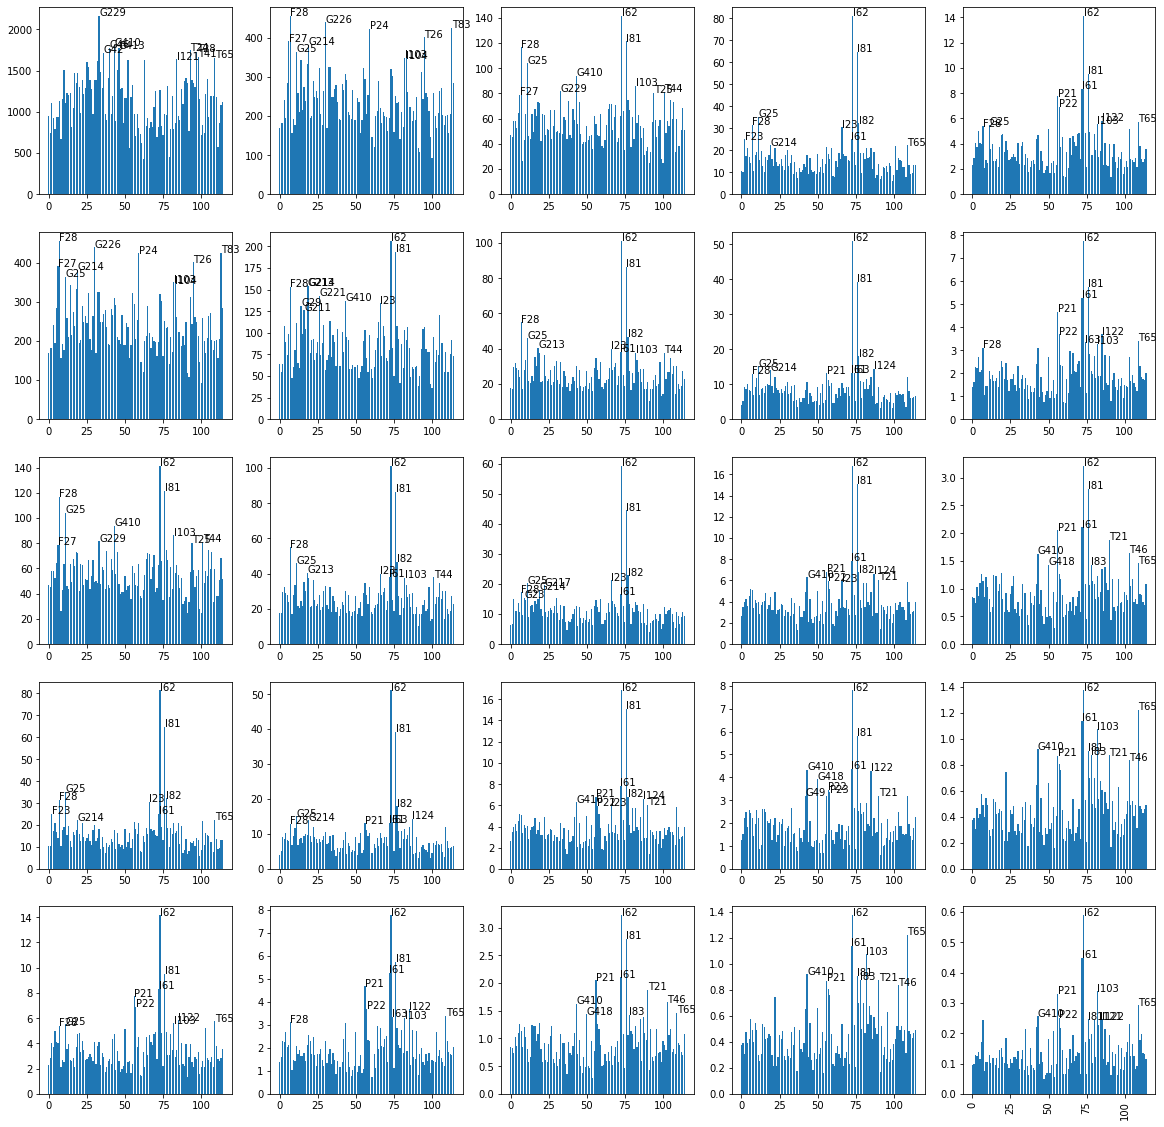

In [19]:
# ======= plotting =========

mat = scipy.io.loadmat("seizure_test2_matrices.mat")["bspecs"]


fig, axs = plt.subplots(5, 5)
fig.set_figheight(20)
fig.set_figwidth(20)


for i in range(5):
    for j in range(5):

        outflow_arr = np.sum(mat[:, :, i, j], axis=0)
        
        for k in range(10):
            q = k / 20 + 0.5
            
        q_value = np.percentile(outflow_arr, q)
        
        
        axs[i][j].bar(np.arange(115), outflow_arr)
        
        top_idx =(-outflow_arr).argsort()[:10]
        
        for k in top_idx:
            axs[i][j].text(k, outflow_arr[k], data.ch_names[k])
        
plt.xticks(rotation=90)
plt.show()
















In [15]:
for i in range(len(data.ch_names)):
    print(i, data.ch_names[i])

0 F21
1 F22
2 F23
3 F24
4 F25
5 F26
6 F27
7 F28
8 G22
9 G23
10 G24
11 G25
12 G26
13 G27
14 G29
15 G210
16 G211
17 G212
18 G213
19 G214
20 G215
21 G216
22 G217
23 G218
24 G219
25 G220
26 G221
27 G222
28 G223
29 G224
30 G226
31 G227
32 G228
33 G229
34 G230
35 G231
36 G42
37 G43
38 G44
39 G45
40 G46
41 G47
42 G49
43 G410
44 G411
45 G412
46 G413
47 G414
48 G415
49 G416
50 G418
51 G419
52 G420
53 G421
54 G422
55 G423
56 P21
57 P22
58 P23
59 P24
60 P41
61 P42
62 I21
63 I22
64 I23
65 I24
66 I41
67 I42
68 I43
69 I44
70 I61
71 I62
72 I63
73 I64
74 I81
75 I82
76 I83
77 I84
78 I101
79 I102
80 I103
81 I104
82 I121
83 I122
84 I123
85 I124
86 I125
87 I126
88 T21
89 T22
90 T23
91 T24
92 T25
93 T26
94 T27
95 T28
96 T41
97 T42
98 T43
99 T44
100 T45
101 T46
102 T47
103 T61
104 T62
105 T63
106 T64
107 T65
108 T66
109 T81
110 T82
111 T83
112 T84
113 T85
114 T86


In [12]:
# ================== testing =========================

raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
# print(raw_data.shape)

print(data.ch_names)
# print(data.get_channel_types())
data.pick_types(seeg=True)
data.resample(1000)
# print(data.info)

['F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G210', 'G211', 'G212', 'G213', 'G214', 'G215', 'G216', 'G217', 'G218', 'G219', 'G220', 'G221', 'G222', 'G223', 'G224', 'G226', 'G227', 'G228', 'G229', 'G230', 'G231', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G49', 'G410', 'G411', 'G412', 'G413', 'G414', 'G415', 'G416', 'G418', 'G419', 'G420', 'G421', 'G422', 'G423', 'P21', 'P22', 'P23', 'P24', 'P41', 'P42', 'ECG1', 'ECG2', 'I21', 'I22', 'I23', 'I24', 'I41', 'I42', 'I43', 'I44', 'I61', 'I62', 'I63', 'I64', 'I81', 'I82', 'I83', 'I84', 'I101', 'I102', 'I103', 'I104', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86', 'T3', 'C3', 'O1', 'EOG1', 'EOG2', 'EMG1', 'EMG2', 'X1', 'X2', 'X3', 'X4']


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/epilepsy/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/hl/w3d269dx5b9fr8ltdzfc5j4c0000gn/T/ipykernel_50099/3982435693.py", line 10, in <module>
    data.resample(1000)
  File "<decorator-gen-205>", line 24, in resample
  File "/usr/local/anaconda3/envs/epilepsy/lib/python3.9/site-packages/mne/io/base.py", line 1248, in resample
    resamp = resample(data_chunk, **kwargs)
  File "<decorator-gen-106>", line 24, in resample
  File "/usr/local/anaconda3/envs/epilepsy/lib/python3.9/site-packages/mne/filter.py", line 1500, in resample
    y[xi] = _fft_resample(x_, new_len, npads, to_removes,
  File "/usr/local/anaconda3/envs/epilepsy/lib/python3.9/site-packages/mne/cuda.py", line 336, in _fft_resample
    y = cuda_dict['irfft'](x_fft, new_len)
  File "/usr/local/anaconda3/envs/epilepsy/lib/python3.9/site-packag

TypeError: object of type 'NoneType' has no len()

In [58]:
import matplotlib.pyplot as plt
print(raw_data.shape)
for i in range(115):
    print(raw_data[i].shape, "====")
    print(np.std(raw_data[i]), np.mean(raw_data[i]))
    print(np.amin(raw_data[i]), np.amax(raw_data[i]))
# print(np.percentile(raw_data, 99))
# print(np.percentile(raw_data, 1))
p1 = np.percentile(raw_data, 1)
p99 = np.percentile(raw_data, 99)
print(p1, p99)



(128, 2667504)
(2667504,) ====
4.7278381434991486e-05 -1.8843109218318337e-09
-0.0002716947567711909 0.0005195428797589075
(2667504,) ====
6.109816889698706e-05 -1.4221541070859152e-08
-0.00029169444426642237 0.00029967131535820564
(2667504,) ====
0.00010091539361687693 -3.6131662578983905e-08
-0.0005930647352101929 0.0004595438172732129
(2667504,) ====
8.833186821818519e-05 -2.451822509589884e-08
-0.000583564883649958 0.00039566981533531713
(2667504,) ====
0.00011533780152496677 -3.5255576363624e-08
-0.000885310168734264 0.0005075430672617687
(2667504,) ====
8.198882788026882e-05 -8.678430748470885e-09
-0.000455566883680476 0.00038766994033722453
(2667504,) ====
7.492107356947061e-05 -3.144364319940456e-09
-0.0004396921317311359 0.00036367031534294665
(2667504,) ====
9.405419016068615e-05 -1.90455446826723e-08
-0.000791436635553521 0.00038566997158770135
(2667504,) ====
9.790243076878859e-05 -5.527219483465716e-09
-0.0003276938817578392 0.0004476690028229192
(2667504,) ====
8.72369130

-0.00039969275674067283 0.00048154347351796764
(2667504,) ====
7.883624899057581e-05 1.439579990947855e-10
-0.00055956525865568 0.0005515423797512781
(2667504,) ====
7.829973456501456e-05 -1.075163798136389e-08
-0.0004476920067292286 0.0004396691278248266
(2667504,) ====
8.737118373875011e-05 -5.492168537322762e-09
-0.0005115660086671244 0.0004156695028305487
(2667504,) ====
6.0563371419817383e-05 7.45596961286205e-09
-0.0003596933817502097 0.0003196710028534372
(2667504,) ====
4.485814355816512e-05 -1.3989865245017685e-09
-0.0003516935067521171 0.00025579700091554145
(2667504,) ====
4.8439493044920004e-05 1.7027879113844328e-09
-0.00031169413176165394 0.00027967162786297407
(2667504,) ====
0.00011977791733883044 1.9549764380588752e-08
-0.001563299574822614 0.0020305192700236516
(2667504,) ====
0.00013461058619223629 7.387507804954765e-09
-0.0015667995201342794 0.001019160072999161
(2667504,) ====
0.00012609237615635093 1.3466785140401844e-08
-0.0016427983326161592 0.000747414319157702

In [59]:
raw_data[raw_data < p1] = p1
raw_data[raw_data > p99] = p99

In [60]:
# print(data.first_time)
# print(data.times) time of each sample
# print(data.annotations.orig_time)
# print(data.annotations.duration) =0?

print(data.annotations.onset)
print(data.annotations.description)

[647.003 651.346 684.494]
['Sz clin ON' 'CRISE' 'Sz clin OFF']


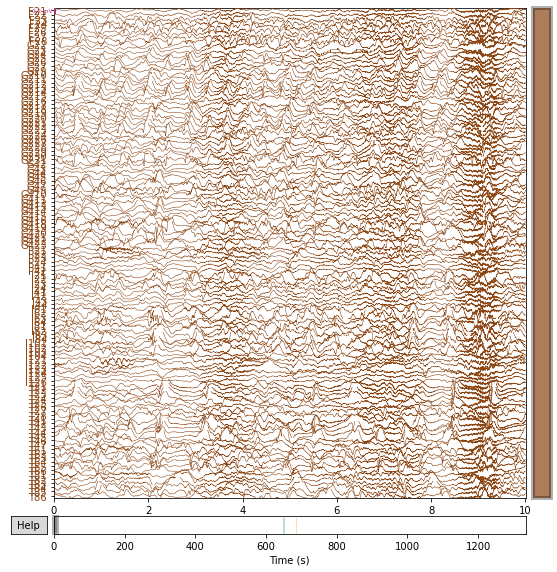

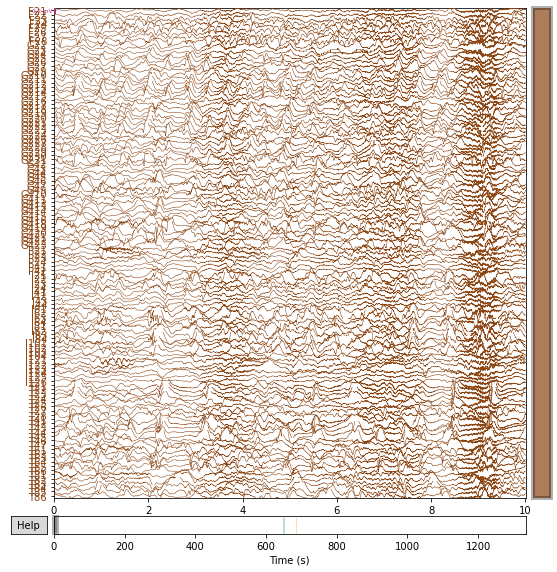

In [61]:
data.plot(n_channels=128)

In [63]:
np.save("seizure_test.npy", seizure)

In [64]:
print(seizure.shape)

ch1 = seizure[0:1, :5000].reshape(-1, 1)
ch2 = seizure[1:2, :5000].reshape(-1, 1)

(128, 37491)


In [32]:
# print(spectrum)#.bispectrumdx()
from spectrum.src3.conventional import bispectrumdx

# seizure
bspec, waxis = bispectrumdx.bispectrumdx(ch1, ch1, ch2, nfft=128, wind=5)



ModuleNotFoundError: No module named 'tools'